# $ Wrangle$ $Linear$ $Regression$

In [1]:
import numpy as np
import pandas as pd
import env
import seaborn as sns
import matplotlib.pyplot as plt
#import wrangle.py as w

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
# squl query for acquisition
sql_query =  """
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            Where propertylandusetypeid = 261;
        """
    # Acquisition
df = pd.read_sql(sql_query, env.get_connection('zillow'))

In [3]:
df.sample(20)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1787127,4.0,2.0,2175.0,140428.0,2008.0,1914.82,6037.0
1817454,4.0,3.0,3023.0,660667.0,1969.0,7589.70,6059.0
67499,2.0,1.0,1249.0,322359.0,1941.0,4309.29,6037.0
1590451,3.0,2.0,1176.0,58742.0,1958.0,894.46,6059.0
653791,4.0,2.0,1625.0,245845.0,1958.0,2878.76,6059.0
2037888,2.0,1.0,1396.0,243762.0,1935.0,3071.01,6037.0
2119824,5.0,2.0,2657.0,343813.0,1974.0,3428.54,6059.0
94247,0.0,0.0,NaN,189669.0,NaN,2155.42,6059.0
1430143,3.0,2.5,1605.0,415000.0,1979.0,4859.78,6059.0
220932,2.0,2.0,1309.0,426535.0,1950.0,5202.56,6037.0


<div class="alert alert-info"> There is 2152863 rows × 7 columns.
I can see NaN in calculatedfinishedsquarefeet,yearbuilt,taxamount

In [4]:
def plot_boxplot(df,feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    Q1 = df[feature].quantile(.25)
    Q2 = df[feature].quantile(.5)
    Q3 = df[feature].quantile(.75)
    Q4 = df[feature].quantile(1)
    IQR =  Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print ('Q1:', Q1)
    print ('Q2:', Q2)
    print ('Q3:', Q3)
    print ('Q4:', Q4)
    print ('IQR', IQR)
    print('lower bound:',lower_bound)
    print('upper bound:' ,upper_bound)
    plt.show()

### Look into bedroom count

In [5]:
df.bedroomcnt.max()

25.0

In [6]:
df[df.bedroomcnt > df.bedroomcnt.quantile(.75)]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
30,5.0,5.5,4092.0,1697000.0,2013.0,27653.50,6059.0
32,5.0,4.5,3066.0,1151781.0,2015.0,12031.72,6059.0
50,5.0,4.5,3207.0,900000.0,2015.0,10059.28,6059.0
63,5.0,3.5,3541.0,933239.0,1960.0,11090.04,6111.0
90,6.0,3.0,2141.0,70421.0,1962.0,791.90,6111.0
...,...,...,...,...,...,...,...
2152818,5.0,5.0,3959.0,880424.0,2014.0,16789.56,6037.0
2152830,5.0,5.0,3605.0,588182.0,2013.0,15464.53,6037.0
2152832,5.0,4.5,4065.0,1342974.0,2014.0,16399.70,6059.0
2152836,5.0,4.0,2992.0,723838.0,2013.0,8691.16,6059.0


Q1: 3.0
Q2: 3.0
Q3: 4.0
Q4: 25.0
IQR 1.0
lower bound: 1.5
upper bound: 5.5


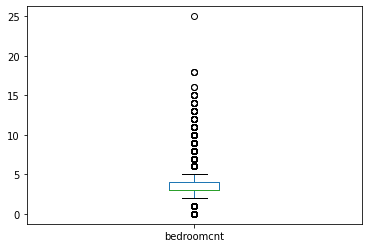

In [95]:
plot_boxplot(df,'bedroomcnt')

In [49]:
df.bedroomcnt.value_counts( sort=True, bins = 5)

(-0.026000000000000002, 5.0]    2121279
(5.0, 10.0]                       31492
(10.0, 15.0]                         75
(15.0, 20.0]                          5
(20.0, 25.0]                          1
Name: bedroomcnt, dtype: int64

In [48]:
(6)/(len(df))* 100,(75 +6)/(2152852)* 100

(0.0002786986445491422, 0.0037624509255629276)

<div class="alert alert-info"> 
6 rows are 15 bedrooms and above that is 0.0003% of total data
    
75 + 6 rows are 10 bedrooms and above that is 0.004% of total data
    
If I where to remove outliers I might set parameters for outliers to be 15+ (revmoves 6 rows) or 10+(removes 81 rows) 

In [34]:
# bedrooms with more than 10 rooms
df[df.bedroomcnt>10]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
26485,25.0,20.0,11700.0,1608491.0,2010.0,19238.87,6037.0
55449,11.0,6.0,4764.0,388324.0,1982.0,5031.98,6037.0
64488,14.0,7.0,4618.0,877333.0,1942.0,10496.86,6037.0
129015,15.0,9.0,11704.0,919654.0,1903.0,12143.97,6037.0
133100,13.0,8.0,11573.0,573666.0,1912.0,7537.95,6037.0
...,...,...,...,...,...,...,...
1952019,11.0,5.0,3197.0,517883.0,1908.0,6449.63,6037.0
2020439,11.0,6.0,6253.0,517790.0,1932.0,6426.23,6037.0
2051558,14.0,20.0,16198.0,9359259.0,1952.0,14900.91,6037.0
2057669,13.0,8.0,7894.0,NaN,1953.0,NaN,6037.0


### Look into bathroom count

Q1: 2.0
Q2: 2.0
Q3: 3.0
Q4: 32.0
IQR 1.0
lower bound: 0.5
upper bound: 4.5


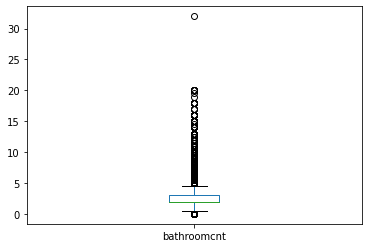

In [18]:
plot_boxplot(df,'bathroomcnt')

In [40]:
df.bathroomcnt.value_counts().sort_values

<bound method Series.sort_values of 2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64>

In [72]:
df.bathroomcnt.value_counts(normalize=False, bins =16)

(-0.033, 2.0]    1402170
(2.0, 4.0]        676495
(4.0, 6.0]         64832
(6.0, 8.0]          7803
(8.0, 10.0]         1198
(10.0, 12.0]         236
(12.0, 14.0]          67
(14.0, 16.0]          30
(16.0, 18.0]          12
(18.0, 20.0]           8
(30.0, 32.0]           1
(20.0, 22.0]           0
(22.0, 24.0]           0
(24.0, 26.0]           0
(26.0, 28.0]           0
(28.0, 30.0]           0
Name: bathroomcnt, dtype: int64

In [74]:
51/2152852 *100

0.0023689505827618434

<div class="alert alert-info"> ????? not sure on this one
21 rows are 16 bathrooms and above that 0.0007% of total data
    
51 rows are 14 bath rooms and above that 0.002% of total data

    
If I where to remove outliers I might set parameters for outliers to be 19.5+ (removes 21 rows) or 14 (removes 76  rows) 

In [85]:
# bathrooms with more than 10 rooms
df.bathroomcnt[df.bathroomcnt>16].value_counts(bins=1)

(16.983999999999998, 32.0]    21
Name: bathroomcnt, dtype: int64

In [50]:
def outliers (df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR =  Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df[(df[feature]<lower_bound) | (df[feature] > upper_bound)]
    return ls

In [59]:
df[df.yearbuilt.isnull()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
...,...,...,...,...,...,...,...
2152823,0.0,0.0,NaN,2568893.0,NaN,27309.30,6059.0
2152844,0.0,0.0,NaN,92679.0,NaN,1090.16,6111.0
2152854,0.0,0.0,NaN,1198476.0,NaN,NaN,6037.0
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0


<div class="alert alert-info"> 
Many values that have a year built NaN also have a bedroomcnt = 0, bathroomcnt = 0 and squarefeet NaN,
     9337 rows 

In [64]:
df[(df.yearbuilt.isnull()) & (df.bathroomcnt.isnull())& (df.calculatedfinishedsquarefeet.isnull())]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


<div class="alert alert-info"> 
There is three rows that have NaN in yearbuilt, bathrommcnt, bedroomcnt. and squarefeet

In [67]:
outliers_bathroom = outliers(df, 'bathroomcnt') 

In [49]:
outliers_bedroom = outliers(df, 'bedroomcnt') 

In [68]:
outliers_squarefeet = outliers(df, 'calculatedfinishedsquarefeet') 

In [69]:
outliers_bathroom = outliers(df, 'bathroomcnt') 

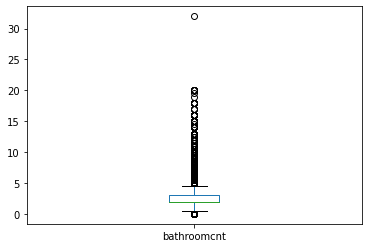

In [72]:
plot_boxplot(df,'bathroomcnt')

In [33]:
# to show all value counts in info
df.info(show_counts=  True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


info() did not mark the null values. All columns are dataType- float64

In [ ]:
df.isnull().any()

In [ ]:
df.isna().sum()

<div class="alert alert-info">
Null values
    
* 11 values in bedroomcnt 
* 11 values in bathroomcnt
* 8484 values in calculatedfinishedsquarefeet
* 493 values in taxvaluedollarcnt
* 9337 values in yearbuilt 
* 4442 values in taxamount

No null values in fips

In [ ]:
df.nunique()

In [ ]:
df.size, df.shape

In [ ]:
df.describe().T

<div class="alert alert-info">
    
Bedroom range 0 to 25
    
bathroom range 0 to 32
    
square feet range 1 to 952576.00
    
Year built has a range from 1801 to 2016
    
Tax amount has a range from 1.85 to 1337755.86
 

In [ ]:
df = df.dropna()

In [ ]:
df.shape

In [31]:
2140235-2152863

-12628

<div class="alert alert-info">
If all null values are dropped we lose 12628 rows

In [2]:
import env
def wrangle_single_family_residential():
    ''' Wrangle_single_family_residential '''
   
    # squl query for acquisition
    sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                FROM properties_2017
                Where propertylandusetypeid = 261;
                """
    # Acquisition
    df = pd.read_sql(sql_query, env.get_connection('zillow'))
    
    df = df.dropna()
    

    return df

In [4]:
df = w. wrangle_single_family_residential()

In [6]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [10]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

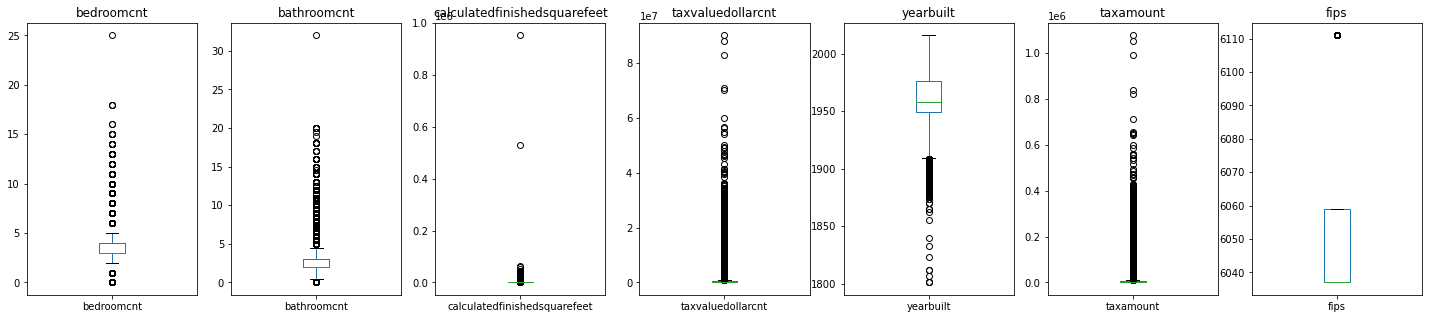

In [26]:
plt.figure(figsize=(25, 5))

for i, col in enumerate(df):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,7,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df.boxplot(column=[col])
    
    # Hide gridlines.
    plt.grid(False)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [23]:
df.shape

(2140235, 7)